# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# 3 Observable Trends/Analysis
----
* Temperature increases towards equator
* r-squared value shows that there is no relationship between latitutde vs. humidity, cloudiness, and wind speed
* Wind speed in cities on both Northern and Southern Hemisphere increases as cities are further away from the equator

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
#Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

lat = []
lng = []
max_temp =[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
cities1=[]

for city in cities:
    try:
        response = requests.get(query_url+city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities1.append(city)
        print(f"city processed: {city}")
    except:
        print(f"-----------city NOT found: {city}")
print("----------------------------------\nData Retrieval Complete\n----------------------------------")

city processed: jamestown
city processed: leningradskiy
city processed: port augusta
city processed: beringovskiy
city processed: seeboden
city processed: salinas
city processed: hilo
city processed: sinnamary
city processed: selenduma
city processed: port-cartier
city processed: kapaa
city processed: vaini
city processed: hithadhoo
city processed: georgetown
city processed: hermanus
city processed: provideniya
city processed: anadyr
-----------city NOT found: attawapiskat
city processed: ushuaia
city processed: blagoyevo
city processed: vila franca do campo
city processed: saskylakh
city processed: mokhsogollokh
-----------city NOT found: saleaula
city processed: mastic beach
city processed: hasaki
city processed: mataura
city processed: cayeli
city processed: dongsheng
city processed: chuy
city processed: port alfred
city processed: rikitea
city processed: victoria
city processed: albany
city processed: bluff
city processed: mahebourg
city processed: mitsamiouli
city processed: guerr

city processed: kiruna
city processed: ketchikan
city processed: ilukste
city processed: vardo
city processed: portland
city processed: klaksvik
city processed: niamey
-----------city NOT found: tungkang
city processed: talara
city processed: santa rosa
city processed: alvorada
city processed: souillac
city processed: shenzhen
city processed: almonte
city processed: gazanjyk
city processed: richards bay
city processed: kahului
city processed: rivne
city processed: kendari
city processed: port elizabeth
city processed: japura
city processed: nanortalik
city processed: hilliard
city processed: pompeu
city processed: brae
city processed: namie
city processed: joshimath
city processed: yerbogachen
city processed: akdepe
city processed: shetpe
-----------city NOT found: milingimbi
city processed: brezovo
city processed: havre-saint-pierre
-----------city NOT found: warqla
city processed: carauari
-----------city NOT found: jabiru
city processed: ushtobe
-----------city NOT found: qabis
city

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dataframe
weather_dict = {
    "City":cities1,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
}
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,24.12,60,100,3.00,US,1643389936
1,leningradskiy,69.3833,178.4167,-11.61,96,97,1.97,RU,1643389941
2,port augusta,-32.5000,137.7667,70.97,69,64,16.69,AU,1643389941
3,beringovskiy,63.0500,179.3167,-6.88,94,83,3.13,RU,1643389942
4,seeboden,46.8219,13.4950,39.25,90,17,5.66,AT,1643389942
...,...,...,...,...,...,...,...,...,...
561,umm kaddadah,13.6017,26.6876,62.62,13,21,13.22,SD,1643390193
562,maumere,-8.6199,122.2111,80.08,84,100,7.56,ID,1643390194
563,gamba,-2.6500,10.0000,78.87,76,38,5.66,GA,1643390194
564,dar es salaam,-6.8235,39.2695,79.99,74,76,8.52,TZ,1643389985


In [5]:
# Export the data into a .csv
weather_df.to_csv(r'C:/Users/foh01/DataClass/6.-Python-API-Challenge/WeatherPy/output_data/weather.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_check = weather_df[(weather_df['Humidity']>100)]
humidity_check

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.
humidity_check.index

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

###There are no cities that have humidity > 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

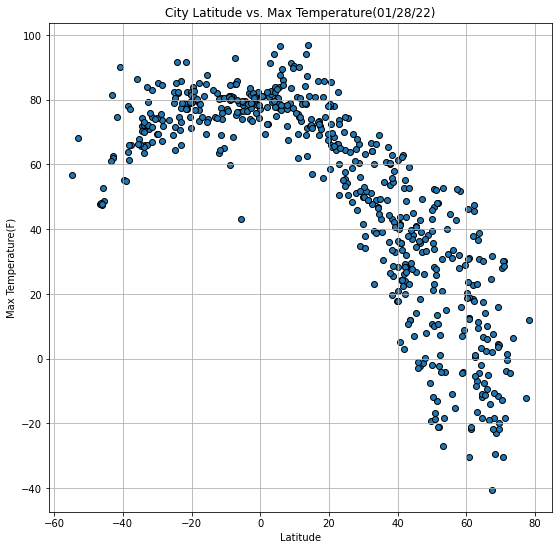

In [18]:
#size configuration
plt.figure(figsize=(9,9))
#Plotting
plt.scatter(lat, max_temp, linewidths=1, marker="o", edgecolors="black")
#Labels
plt.title("City Latitude vs. Max Temperature(01/28/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid(True)
#Save figure
plt.savefig("Images/Fig1.png")

## Latitude vs. Humidity Plot

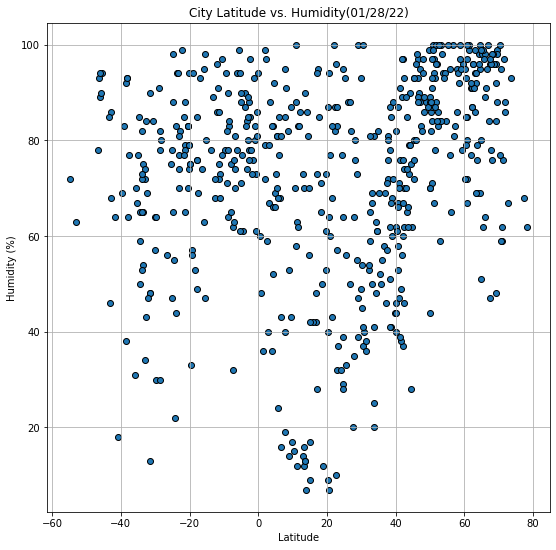

In [19]:
#variables: cities1, lat, lng, max_temp, humidity, cloudiness, wind_speed, country, date

#size configuration
plt.figure(figsize=(9,9))
#Plotting
plt.scatter(lat, humidity, linewidths=1, marker="o", edgecolors="black")
#Labels
plt.title("City Latitude vs. Humidity(01/28/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
#Save figure
plt.savefig("Images/Fig2.png")

## Latitude vs. Cloudiness Plot

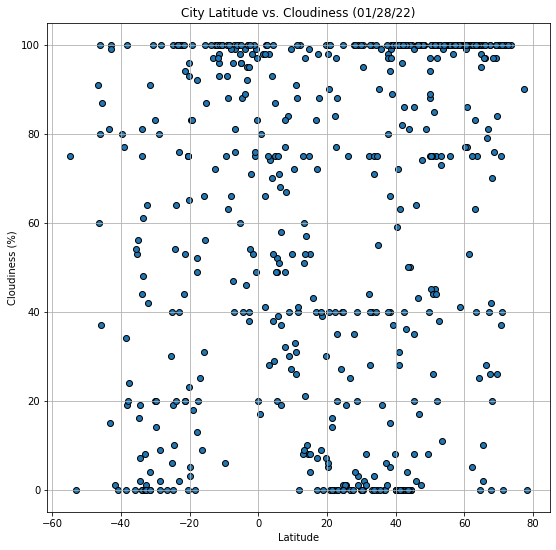

In [21]:
#variables: cities1, lat, lng, max_temp, humidity, cloudiness, wind_speed, country, date

#size configuration
plt.figure(figsize=(9,9))
#Plotting
plt.scatter(lat, cloudiness, linewidths=1, marker="o", edgecolors="black")
#Labels
plt.title("City Latitude vs. Cloudiness (01/28/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
#Save figure
plt.savefig("Images/Fig3.png")

## Latitude vs. Wind Speed Plot

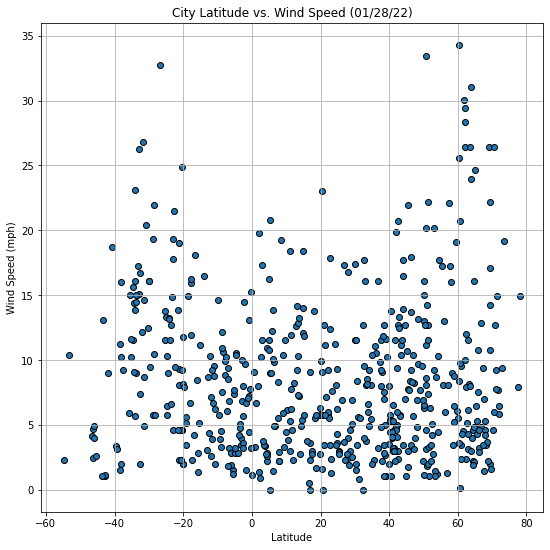

In [22]:
#variables: cities1, lat, lng, max_temp, humidity, cloudiness, wind_speed, country, date

#size configuration
plt.figure(figsize=(9,9))
#Plotting
plt.scatter(lat, wind_speed, linewidths=1, marker="o", edgecolors="black")
#Labels
plt.title("City Latitude vs. Wind Speed (01/28/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
#Save figure
plt.savefig("Images/Fig4.png")

## Linear Regression

In [26]:
#Constant x_values (Latitude)
    #x_values = lat
    #y_values = 
    #(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    #regress_values = x_values * slope + intercept
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
northern_df = weather_df.loc[weather_df["Lat"] > 0]
southern_df = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.739095862480113


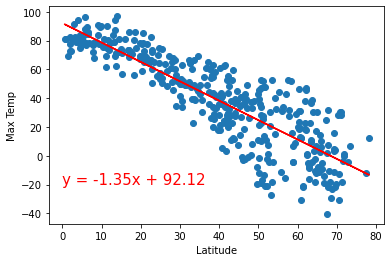

In [55]:
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,-20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
#Save figure
plt.savefig("Images/Fig5.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2522814776046606


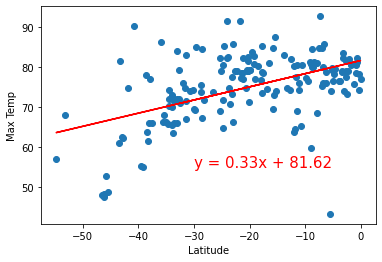

In [56]:
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-30,55), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
#Save figure
plt.savefig("Images/Fig6.png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2058635287886999


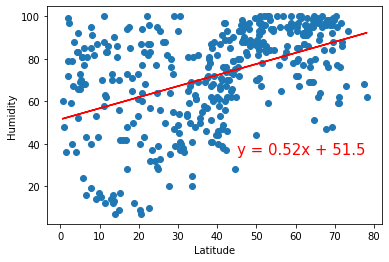

In [57]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45,35), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
#Save figure
plt.savefig("Images/Fig7.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.057725858006531294


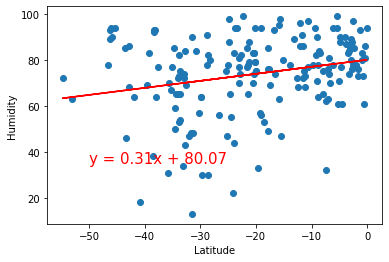

In [58]:
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,35), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
#Save figure
plt.savefig("Images/Fig8.png")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08206469088588396


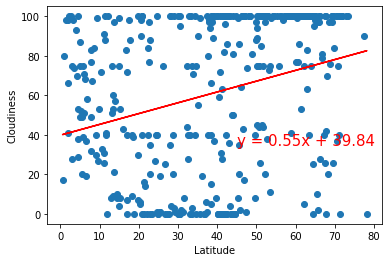

In [59]:
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45,35), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
#Save figure
plt.savefig("Images/Fig9.png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17176272711046886


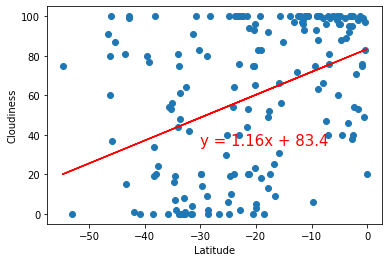

In [60]:
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-30,35), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
#Save figure
plt.savefig("Images/Fig10.png")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023204621748434427


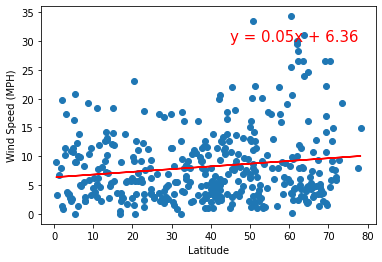

In [61]:
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45,30), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
print(f"The r-squared is: {rvalue**2}")
#Save figure
plt.savefig("Images/Fig11.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04706973026067523


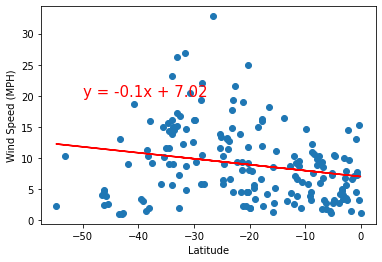

In [62]:
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
print(f"The r-squared is: {rvalue**2}")
#Save figure
plt.savefig("Images/Fig12.png")
plt.show()
